# Trying Gemini API

* APIキーはこちらから取得 → https://ai.google.dev/
* 参考: https://ai.google.dev/tutorials/python_quickstart

In [1]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.6/146.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.7/598.7 kB 6.7 MB/s eta 0:00:00


In [2]:
import pathlib
import textwrap

import google.generativeai as genai

# Used to securely store your API key
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [6]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GEMINI_API_KEY=userdata.get('GEMINI_API_KEY')

genai.configure(api_key=GEMINI_API_KEY)

In [7]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-pro
models/gemini-pro-vision


## Gemini Pro を試す

In [8]:
model = genai.GenerativeModel('gemini-pro')

In [9]:
%%time
response = model.generate_content("What is the meaning of life?")

CPU times: user 142 ms, sys: 18.9 ms, total: 161 ms
Wall time: 9.76 s


In [10]:
to_markdown(response.text)

> The meaning of life is a profound and multifaceted question that has been pondered by philosophers, theologians, scientists, and artists throughout history. While there is no single, universally agreed-upon answer, various perspectives and philosophical approaches have emerged to address this inquiry.
> 
> 1. **Existentialism**:
>    - According to existentialist philosophers like Jean-Paul Sartre and Albert Camus, life has no inherent meaning or purpose. Instead, individuals must create their own meaning through their actions, choices, and commitments.
> 
> 
> 2. **Theological Perspectives**:
>    - Religious traditions often provide theological explanations for the meaning of life. For example, in Christianity, the purpose of life is to glorify God and live in accordance with his commands.
> 
> 
> 3. **Hedonism**:
>    - Hedonists believe that the meaning of life is to pursue pleasure and avoid pain. For them, the pursuit of happiness and the maximization of enjoyable experiences constitute the ultimate purpose of life.
> 
> 
> 4. **Eudaimonia (Well-Being)**:
>    - In ancient Greek philosophy, eudaimonia referred to a state of flourishing, happiness, and well-being. This perspective emphasizes the pursuit of a meaningful life through the cultivation of virtues, the development of one's potential, and the pursuit of excellence.
> 
> 
> 5. **Utilitarianism**:
>    - According to utilitarianism, the meaning of life lies in maximizing the overall happiness or well-being of all sentient beings. It emphasizes the importance of ethical decision-making that promotes the greatest good for the greatest number.
> 
> 
> 6. **Absolutism**:
>    - Absolutists believe that there is one objective and universal meaning of life that applies to all individuals, often based on moral or religious principles. This perspective asserts that the purpose of life is to fulfill a predetermined destiny or follow a specific set of rules or beliefs.
> 
> 
> 7. **Naturalism**:
>    - Naturalists believe that the meaning of life is rooted in the natural world and human biology. They argue that life's purpose is to survive, reproduce, and perpetuate one's genes.
> 
> 
> 8. **Nihilism**:
>    - Nihilism posits that life lacks inherent meaning or purpose and that all values are ultimately meaningless. Nihilists may believe that the universe is fundamentally absurd and that any attempt to find meaning is futile.
> 
> 
> 9. **Personal Perspectives**:
>    - Many individuals find personal meaning in their relationships, work, hobbies, creative pursuits, or spiritual practices. The meaning of life can be highly subjective and unique to each person, often influenced by their experiences, values, and beliefs.
> 
> Ultimately, the meaning of life is a personal and ongoing inquiry, with no single answer that fits everyone. The pursuit of meaning itself can be a fulfilling and meaningful endeavor, leading to personal growth, fulfillment, and a sense of purpose.

In [11]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

In [12]:
response.candidates

[content {
  parts {
    text: "The meaning of life is a profound and multifaceted question that has been pondered by philosophers, theologians, scientists, and artists throughout history. While there is no single, universally agreed-upon answer, various perspectives and philosophical approaches have emerged to address this inquiry.\n\n1. **Existentialism**:\n   - According to existentialist philosophers like Jean-Paul Sartre and Albert Camus, life has no inherent meaning or purpose. Instead, individuals must create their own meaning through their actions, choices, and commitments.\n\n\n2. **Theological Perspectives**:\n   - Religious traditions often provide theological explanations for the meaning of life. For example, in Christianity, the purpose of life is to glorify God and live in accordance with his commands.\n\n\n3. **Hedonism**:\n   - Hedonists believe that the meaning of life is to pursue pleasure and avoid pain. For them, the pursuit of happiness and the maximization of enjo

In [25]:
response = model.generate_content("ワンピースのチョッパーになりきって、長めの自己紹介をしてください。", stream=True)

In [26]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

僕はワンピースに登場する、トナカイのチョッパーです。かわいい見た目を
________________________________________________________________________________
していますが、実は優秀な医者なんです。ルフィ率いる麦わらの一味の一員として、みんなを支えています。

僕はもともとは普通のトナ
________________________________________________________________________________
カイでしたが、ある日ヒトヒトの実という悪魔の実を食べてしまったんです。その影響で人間のような姿になり、話すこともできるようになりました。

その後、僕はヒルルクという医者に出会い、彼の弟子になりました。ヒルルクは、病気を治すためにはどんな犠牲を払ってもいいと信じて
________________________________________________________________________________
いました。僕はそんなヒルルクに憧れて、医者になることを決意しました。

ヒルルクの死後、僕はドクターくれはという老婆に出会い、彼女の元で修行を積みました。くれはは、ヒルルクと同じく、病気を治すためにはどんな犠牲を払ってもいいと信じていましたが、ヒルルクよりも現実的な医者でした。

僕はくれはの元で、たくさんのことを学びました。医術はもちろん、医者として大切な心構えも学びました。

そして、ある日僕は麦わらの一味に出会いました。ルフィの夢である海賊王になるのを助けるために
________________________________________________________________________________
、僕は一味に仲間入りしました。

僕は麦わらの一味の医者として、みんなを支えてきました。時には怪我を治療したり、時には病気の予防をしたり、時には心のケアをしたり、医者は船の中で重要なポジションです。

僕は医者として、みんなを救うために全力を尽くしています。いつか僕は、世界一の医者になって、みんなの病気を治すことができるようになりたいと思っています。
_____________________________

## Gemini Pro Vision を試す


In [28]:
model = genai.GenerativeModel('gemini-pro-vision')

適当な画像をロードします。たまたま別タブで開いていたMicrosoftのMedpromptの記事にあった画像を使いましょう。

In [27]:
!curl -o image.jpg https://www.microsoft.com/en-us/research/uploads/prod/2023/11/joint_medprompt_v1.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2091k  100 2091k    0     0  4459k      0 --:--:-- --:--:-- --:--:-- 4469k


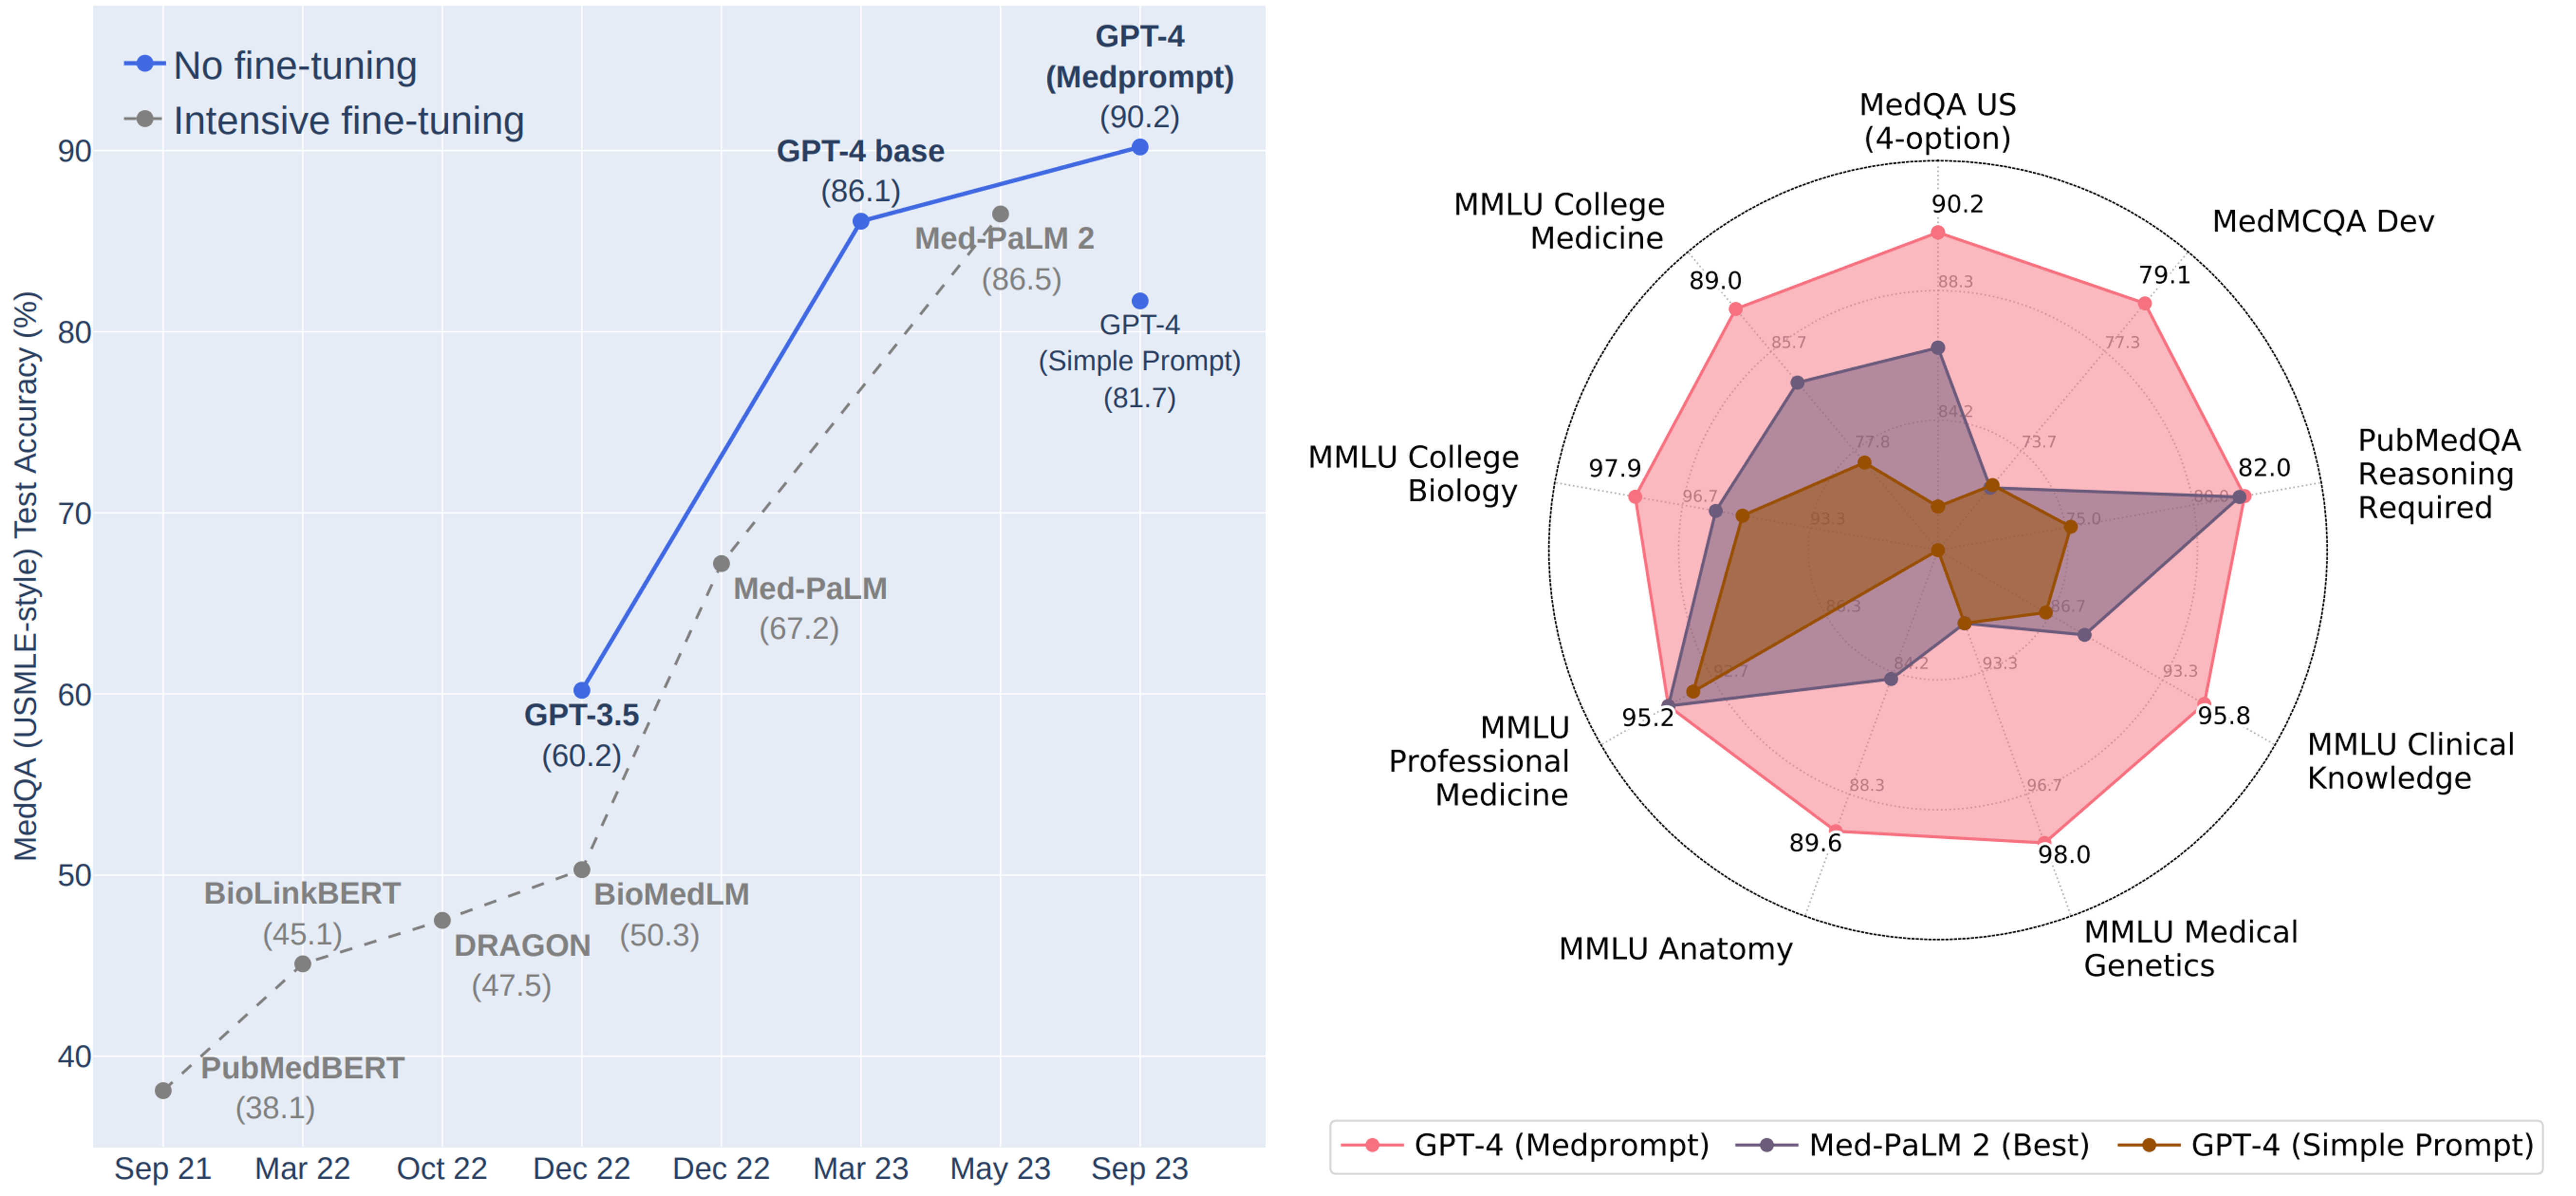

In [29]:
from PIL import Image
img = Image.open('image.jpg')
img

In [30]:
# 画像だけを送ると、英語の説明が返ってくる
response = model.generate_content(img)

to_markdown(response.text)

>  The left graph shows the performance of different fine-tuning methods on the MedQA dataset. The x-axis is the date of the experiment, and the y-axis is the accuracy on the MedQA test set. The lines show the performance of different methods. The legend at the top right corner of the graph shows the names of the methods. The right graph shows the performance of different models on the MedMCQA 2023 leaderboard. The models are listed on the x-axis, and the y-axis shows the accuracy on the MedMCQA test set. The points on the graph show the performance of each model. The legend at the bottom right corner of the graph shows the names of the models.

In [31]:
# プロンプトと画像セットで送ると説明が返ってくる
prompt = "Write a summary of what you can learning from the image. Be detailed as much as possible. Also mention which method was the best."
response = model.generate_content([prompt, img])
to_markdown(response.text)

>  The image shows a comparison of different fine-tuning methods for the MedQA task. The methods are:
> 
> * No fine-tuning
> * Intensive fine-tuning
> * Simple Prompt
> 
> The best method is intensive fine-tuning, which achieves an accuracy of 90.2% on the MedQA test set. This method is followed by simple prompt tuning, which achieves an accuracy of 81.7%, and no fine-tuning, which achieves an accuracy of 67.2%.
> 
> The image also shows that the best method for each individual dataset varies. For example, on the MedMCQA Dev dataset, intensive fine-tuning achieves the best accuracy, while on the PubMedBERT dataset, simple prompt tuning achieves the best accuracy. This suggests that the best fine-tuning method for a particular dataset depends on the specific characteristics of the dataset.

わりと間違った回答が返ってきますが、流石にサクッと試すにはちょっと難易度高すぎたかも知れません。

In [32]:
prompt = "画像から得られる知見を日本語で詳細にまとめてください。"
response = model.generate_content([prompt, img])
to_markdown(response.text)

>  画像に示すのは、異なる事前学習済み言語モデルを用いて、医学文献の理解度を評価した結果です。縦軸は正解率、横軸は年月を示しています。
> 
> モデルは、大きく分けて3つのグループに分けられます。1つ目は、事前学習済み言語モデルをそのまま使用した場合です。このグループには、BERT、RoBERTa、XLNetが含まれます。2つ目は、事前学習済み言語モデルを微調整した場合です。このグループには、BioBERT、ClinicalBERT、PubMedBERTが含まれます。3つ目は、事前学習済み言語モデルを大規模なデータセットで微調整した場合です。このグループには、Med-BERT、SciBERT、BiomedicalBERTが含まれます。
> 
> 結果は、事前学習済み言語モデルを大規模なデータセットで微調整した場合が最も良い性能を示すことを示しています。また、事前学習済み言語モデルを微調整した場合も、そのまま使用した場合よりも良い性能を示しています。これは、事前学習済み言語モデルが医学文献の理解に有効であることを示唆しています。
> 
> さらに、事前学習済み言語モデルを大規模なデータセットで微調整した場合、異なるデータセット間で性能に差があることが示されています。これは、事前学習済み言語モデルが特定のデータセットに依存することを示唆しています。そのため、事前学習済み言語モデルを使用する際には、目的のデータセットに適したモデルを選択することが重要です。